In [1]:
from dataset import *
from modelling.train import *
#from temp.ProgressiveFusionUNET import create_progressive_fusion_unet
from modelling.ProgressiveFusionUNET_V2 import create_progressive_fusion_unet
import numpy

c:\Users\CL-11\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
levels = 6
img_size = 256

model = create_progressive_fusion_unet(n_fusion_levels=levels)
dataset = get_dataset(basedir='../data/FusedDataset', size=img_size, levels=levels)


Processing patient RawDataQA (10) with 6 levels
Processing patient RawDataQA (2) with 6 levels


In [5]:
train_loader, val_loader, test_loader = dataset

In [7]:
#latest_checkpoint = r'checkpoints/256_checkpoint_epoch_15.pt'
latest_checkpoint = r'checkpoints/128_checkpoint_epoch_9.pt'
checkpoint = torch.load(latest_checkpoint)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

torch.Size([6, 1, 256, 256])
torch.Size([6, 1, 256, 256])


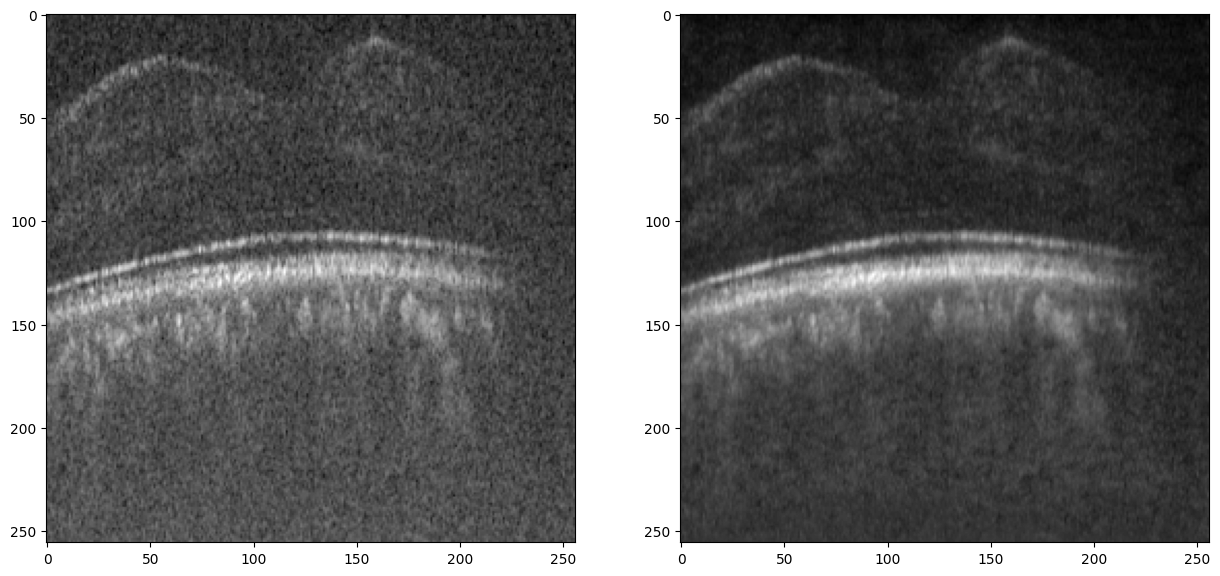

In [9]:
sample = next(iter(val_loader))

model.eval()


with torch.no_grad():
    input = sample[0][0]
    fused = sample[0][0]
    #assert input.shape == fused.shape == (1, img_size, img_size)

    print(input.shape)
    
    output = model(input)

    print(output.shape)

    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(input[0][0].cpu().numpy(), cmap='gray')


    plt.subplot(1,2,2)
    plt.imshow(output[0][0].cpu().numpy(), cmap='gray')

    plt.show()